In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import pytz
import sklearn
import scipy
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [2]:
import warnings

# Suppress future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
   
# Suppress SettingWithCopyWarning


In [3]:
data = pd.read_csv('CPS.csv')

In [4]:
# Select and rename relevant columns for analysis out of the 356 original columns 
selected_columns = {
    # Household Information
    
    'hrnumhou': 'household_members',  # Number of members in a household
    'hefaminc' : 'family_income',

    # Education and Certification Details
    'peschlvl': 'highest_level_of_school',  # Highest level of school 
    'peeduca': 'education_level',  # Highest level of education completed
    'peedegr': 'highest_degree_earned',  # Highest degree earned
    'petrain': 'received_job_training',  # Received job training past high school
    'pecert1': 'professional_certification1',  # Professional certification 1
    'pecert2': 'cert_issued_by_state_or_gov',  # Is certificate issued by the state or the federal government?
    'pecert3': 'is_cert_required',  # Is certification needed for the job?

    # Employment and Income Details
    'pemlr': 'employment_status',  # Employment status
    'prunedor': 'duration_of_unemployment',  # Duration of unemployment
    'hefaminc': 'family_income',  # Family income
    'primind1': 'primary_industry_code_job1',  # Primary industry code for job 1
    'peio1icd': 'industry_code_job1',  # Industry code for job 1
    'ptio1ocd': 'occupation_code_job1',  # Occupation code for job 1
    'primind2': 'primary_industry_code_job2',  # Primary industry code for job 2
    'peio2icd': 'industry_code_job2',  # Industry code for job 2
    'ptio2ocd': 'occupation_code_job2',  # Occupation code for job 2
    'puwk': 'did_work_last_week',  # Did the individual work last week
    
    # Earnings
    'pternh1c': 'earnings_first_job',  # Earnings from the first job
    'pthr': 'total_hours_worked',  # Total hours worked
    'pternwa': 'weekly_earnings',  # Weekly earnings

    # Demographic Variables
    'ptdtrace': 'race',  # Race
    'prtage': 'age', 
    'pesex': 'gender',  # Gender
    'prcitshp': 'citizenship_status',  # Citizenship status

     # Geographic Information
    'gestfips': 'state_code',  # State FIPS code
    

     # Work Arrangement and Preferences
    'pehruslt': 'usual_hours_worked',  # Usual hours worked per week
    'pewa': 'work_at_home',  # Ability or frequency of working from home
    'pewm': 'work_multiple_jobs',  # Working multiple jobs
    
   
     # Job Search and Unemployment Details
    'pruntype': 'reason_for_unemployment',  # Reason for unemployment
    'pulaydtx': 'weeks_looking_for_work',  # Weeks spent looking for work
    'pulkm1': 'primary_method_of_job_search',  # Primary method of job search
    'puhrck12': 'job_search_method',  # Job search method

     # Health and Disability
    'pedisabl': 'disability_status',  # Disability status
    'pehspnon': 'health_status_impacting_work',  # Health status impacting work
    
}

In [5]:
# Filter the dataset to keep only the selected columns, verifying they exist
data = data[[col for col in selected_columns if col in data.columns]].rename(columns=selected_columns)

In [6]:
data

,interview_outcome,household_members,family_income,highest_level_of_school,education_level,professional_certification1,cert_issued_by_state_or_gov,is_cert_required,employment_status,primary_industry_code_job1,...,total_hours_worked,weekly_earnings,race,age,gender,citizenship_status,state_code,usual_hours_worked,reason_for_unemployment,health_status_impacting_work
0,201,3,12,-1.0,37.0,2.0,-1.0,-1.0,4.0,4.0,...,0,-1.0,1.0,35.0,2.0,1.0,1,-1.0,2.0,2.0
1,201,3,12,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,0,-1.0,1.0,12.0,1.0,1.0,1,-1.0,-1.0,2.0
2,201,3,12,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,0,-1.0,1.0,9.0,2.0,1.0,1,-1.0,-1.0,2.0
3,201,1,13,-1.0,40.0,2.0,-1.0,-1.0,1.0,18.0,...,0,115400.0,1.0,50.0,2.0,1.0,1,40.0,-1.0,2.0
4,201,2,16,-1.0,40.0,2.0,-1.0,-1.0,1.0,4.0,...,0,72000.0,1.0,58.0,1.0,1.0,1,40.0,-1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126779,218,0,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,56,NaN,NaN,NaN
126780,218,5,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,56,NaN,NaN,NaN
126781,218,0,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,56,NaN,NaN,NaN
126782,218,5,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,56,NaN,NaN,NaN


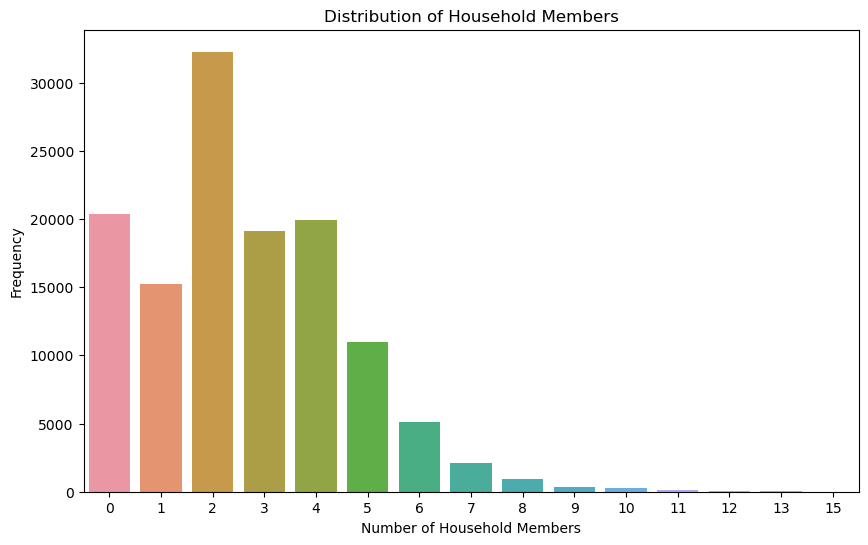

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Remove any leading/trailing whitespace characters in column names
data.columns = data.columns.str.strip()

# Plotting using seaborn's countplot for discrete values (if feasible)
plt.figure(figsize=(10, 6))
sns.countplot(x='household_members', data=data)
plt.title('Distribution of Household Members')
plt.xlabel('Number of Household Members')
plt.ylabel('Frequency')
plt.show()


In [11]:
# Impute -1 in Family income with weekly earning values when family income is -1
data.loc[(data['weekly_earnings'] != -1) & (data['family_income'] == -1), 'family_income'] = data['weekly_earnings']

In [12]:
# Replace NaN values with -1
data.fillna(-1, inplace=True)

In [13]:
data.corr()

,interview_outcome,household_members,family_income,highest_level_of_school,education_level,professional_certification1,cert_issued_by_state_or_gov,is_cert_required,employment_status,primary_industry_code_job1,...,total_hours_worked,weekly_earnings,race,age,gender,citizenship_status,state_code,usual_hours_worked,reason_for_unemployment,health_status_impacting_work
interview_outcome,1.000000,-0.148273,-0.268412,-0.036528,-0.226762,-0.217685,-0.062706,-0.051099,-0.161018,-0.114419,...,-0.029641,-0.089697,-0.180769,-0.209871,-0.274762,-0.205705,0.029388,-0.107509,-0.020419,-0.294928
household_members,-0.148273,1.000000,0.547456,0.147081,0.181587,0.188781,0.045012,0.049557,0.126980,0.146302,...,0.002044,0.037416,0.392160,0.057427,0.500987,0.424425,-0.016181,0.140063,0.038576,0.498133
family_income,-0.268412,0.547456,1.000000,0.108048,0.625957,0.577908,0.229165,0.220739,0.336488,0.409742,...,0.023287,0.156648,0.525560,0.518597,0.788467,0.575909,-0.012196,0.426738,0.021515,0.847197
highest_level_of_school,-0.036528,0.147081,0.108048,1.000000,0.160567,0.185743,-0.016332,-0.016671,0.244464,0.060434,...,-0.004323,-0.021227,0.103742,-0.086115,0.123900,0.076899,-0.007762,-0.033241,0.038939,0.114297
education_level,-0.226762,0.181587,0.625957,0.160567,1.000000,0.957978,0.278930,0.257289,0.676103,0.531099,...,0.024401,0.171741,0.398851,0.813698,0.667594,0.548853,-0.015153,0.520503,0.078996,0.709779
professional_certification1,-0.217685,0.188781,0.577908,0.185743,0.957978,1.000000,0.040038,0.036878,0.727126,0.447204,...,0.014707,0.130831,0.392924,0.793313,0.649998,0.554577,-0.017120,0.445727,0.088025,0.683755
cert_issued_by_state_or_gov,-0.062706,0.045012,0.229165,-0.016332,0.278930,0.040038,1.000000,0.905661,0.010098,0.363871,...,0.032120,0.142496,0.089930,0.188083,0.178438,0.106266,0.010132,0.330226,-0.002176,0.194902
is_cert_required,-0.051099,0.049557,0.220739,-0.016671,0.257289,0.036878,0.905661,1.000000,-0.060018,0.411306,...,0.034438,0.158358,0.083090,0.151950,0.163839,0.098958,0.012204,0.379798,0.003435,0.178639
employment_status,-0.161018,0.126980,0.336488,0.244464,0.676103,0.727126,0.010098,-0.060018,1.000000,-0.106770,...,-0.006346,-0.045612,0.287030,0.639433,0.496211,0.380355,-0.021714,-0.145115,0.098682,0.499006
primary_industry_code_job1,-0.114419,0.146302,0.409742,0.060434,0.531099,0.447204,0.363871,0.411306,-0.106770,1.000000,...,0.035875,0.236459,0.219200,0.273325,0.355475,0.297602,-0.002629,0.735263,0.091680,0.357422


In [14]:
'''
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Set a high correlation threshold
high_corr_threshold = 0.9

# Find features with correlation greater than 0.9 or less than -0.9
highly_corr_vars = set()
for col in correlation_matrix.columns:
    for row in correlation_matrix.index:
        if (correlation_matrix.loc[row, col] > high_corr_threshold or correlation_matrix.loc[row, col] < -high_corr_threshold) and row != col:
            highly_corr_vars.add(tuple(sorted((row, col))))

# Remove one of each pair (you might want to customize which one to remove)
columns_to_remove = set()
for var1, var2 in highly_corr_vars:
    # Add one of the pair to the set to be removed
    columns_to_remove.add(var1)  # You could choose var1 or var2

# Drop the columns from the dataframe
data_reduced = data.drop(columns=columns_to_remove)

# df_reduced is now ready for further analysis such as K-means clustering
'''

'\n# Calculate the correlation matrix\ncorrelation_matrix = data.corr()\n\n# Set a high correlation threshold\nhigh_corr_threshold = 0.9\n\n# Find features with correlation greater than 0.9 or less than -0.9\nhighly_corr_vars = set()\nfor col in correlation_matrix.columns:\n    for row in correlation_matrix.index:\n        if (correlation_matrix.loc[row, col] > high_corr_threshold or correlation_matrix.loc[row, col] < -high_corr_threshold) and row != col:\n            highly_corr_vars.add(tuple(sorted((row, col))))\n\n# Remove one of each pair (you might want to customize which one to remove)\ncolumns_to_remove = set()\nfor var1, var2 in highly_corr_vars:\n    # Add one of the pair to the set to be removed\n    columns_to_remove.add(var1)  # You could choose var1 or var2\n\n# Drop the columns from the dataframe\ndata_reduced = data.drop(columns=columns_to_remove)\n\n# df_reduced is now ready for further analysis such as K-means clustering\n'

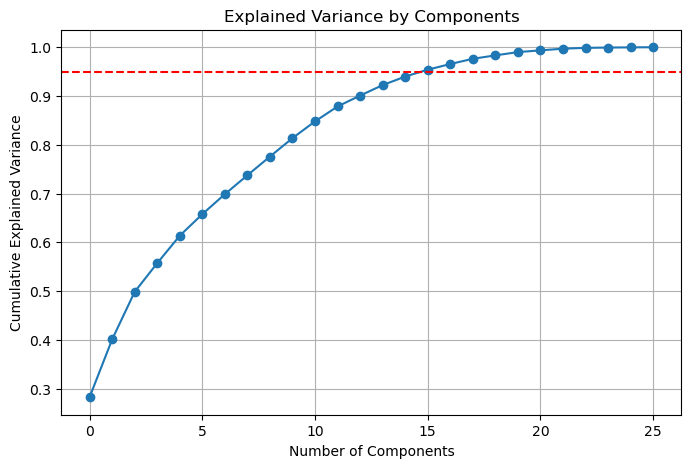

In [15]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd



# Scaling the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(data)

pca = PCA().fit(df_scaled)
explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 5))
plt.plot(explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Components')
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='--')  # Line at 95% variance
plt.show()

In [16]:
# Using the PCA fit from before
eigenvalues = pca.explained_variance_
print("Eigenvalues:\n", eigenvalues)
num_components_kaiser = np.sum(eigenvalues > 1)
print("Number of Components with Eigenvalues > 1:", num_components_kaiser)

Eigenvalues:
 [7.33997843 3.08018859 2.53708191 1.53029533 1.46410606 1.14803776
 1.06568331 1.00877461 0.9961255  0.9829888  0.8936436  0.7954662
 0.58020372 0.5588051  0.45555687 0.36491881 0.30278342 0.27922725
 0.18195311 0.17473244 0.09231648 0.08937879 0.04360069 0.01685775
 0.0097875  0.00771305]
Number of Components with Eigenvalues > 1: 8


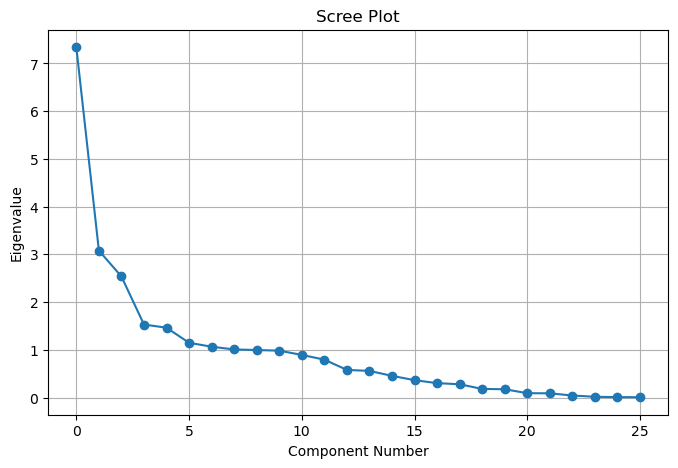

In [17]:
plt.figure(figsize=(8, 5))
plt.plot(eigenvalues, marker='o')
plt.xlabel('Component Number')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

In [18]:
# Applying PCA
pca = PCA(n_components=10)  # Adjust the number of components based on the variance ratio or your preference
principal_components = pca.fit_transform(df_scaled)

# Examine component loadings
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
loading_matrix = pd.DataFrame(loadings, columns=[f'PC{i+1}' for i in range(pca.n_components_)], index=data.columns)
print("Loadings:\n", loading_matrix)

Loadings:
                                    PC1       PC2       PC3       PC4  \
interview_outcome            -0.310829  0.097666 -0.073894 -0.116291   
household_members             0.427704 -0.172517  0.076678  0.710700   
family_income                 0.817055 -0.135759  0.037345  0.307463   
highest_level_of_school       0.141942 -0.137086  0.086968  0.081933   
education_level               0.895985 -0.110237  0.019265 -0.379510   
professional_certification1   0.840843 -0.239291  0.094858 -0.385467   
cert_issued_by_state_or_gov   0.353507  0.440503 -0.273976 -0.044552   
is_cert_required              0.352767  0.498889 -0.301101 -0.017618   
employment_status             0.483681 -0.585863  0.321994 -0.405306   
primary_industry_code_job1    0.652767  0.511197 -0.338408 -0.025951   
industry_code_job1            0.657581  0.509737 -0.338406 -0.026414   
occupation_code_job1          0.522811  0.352049 -0.267246 -0.022940   
primary_industry_code_job2    0.109856  0.549128  0.7

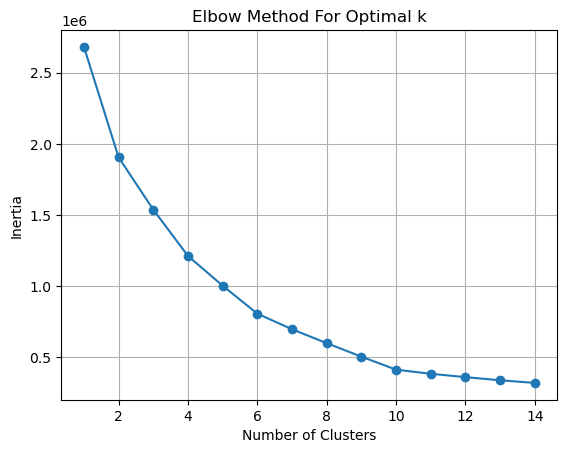

In [19]:
inertia = []
range_values = range(1, 15)  # Testing 1-14 clusters

for i in range_values:
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(principal_components)
    inertia.append(kmeans.inertia_)

plt.plot(range_values, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

In [25]:
# optimal_k is the chosen number of clusters
optimal_k = 6  # k chosen from the elbow method or other criterion
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(principal_components)

#  these cluster labels to your original or reduced DataFrame for further analysis
data['Cluster'] = clusters 

Cluster centers:
         PC1        PC2        PC3       PC4       PC5       PC6       PC7  \
0 -4.529512   0.902545  -0.330199 -0.517824 -0.137017 -0.082808  0.105817   
1  4.361565  13.984105  18.344367 -0.003948 -0.060686 -0.522041 -0.477905   
2  0.887572  -2.023347   1.076053 -0.794674  0.586196 -0.010500  0.092993   
3  2.956148   2.455542  -1.902997 -0.068351  2.519943 -0.410162  0.102154   
4  2.160748   0.440069  -0.593359 -0.034287 -1.418265  0.060937 -0.061048   
5 -1.258987  -0.621556   0.355122  2.536011  0.366243  0.328347 -0.278590   

        PC8       PC9      PC10  
0  0.056574 -0.014993 -0.071682  
1 -0.044497 -0.333319  0.113018  
2 -0.017074  0.021907 -0.125806  
3  0.060437 -0.041139 -0.003077  
4 -0.014106  0.016230  0.007440  
5 -0.068310 -0.013376  0.347561  


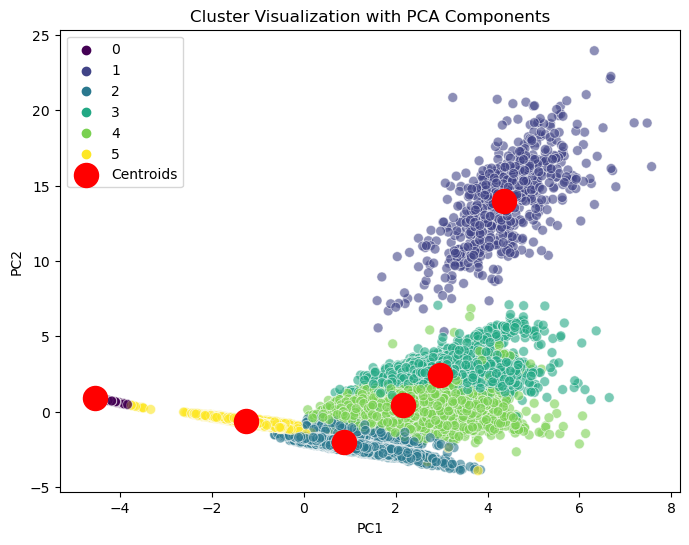

In [27]:
# Viewing cluster centers
centers = pd.DataFrame(kmeans.cluster_centers_, columns=[f'PC{i+1}' for i in range(10)])
print("Cluster centers:\n", centers)

# Visualizing clusters (if reduced to 2 or 3 dimensions earlier)
import seaborn as sns
if principal_components.shape[1] >= 2:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=principal_components[:, 0], y=principal_components[:, 1], hue=clusters, palette='viridis', s=50, alpha=0.6)
    plt.scatter(centers.iloc[:, 0], centers.iloc[:, 1], s=300, c='red', label='Centroids')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('Cluster Visualization with PCA Components')
    plt.legend()
    plt.show()

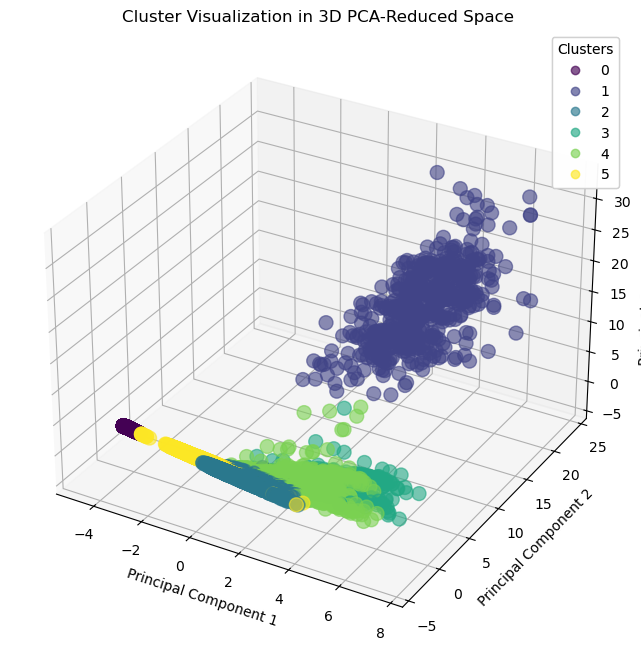

In [28]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(principal_components[:, 0], principal_components[:, 1], principal_components[:, 2], c=clusters, cmap='viridis', s=100, alpha=0.6)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.title('Cluster Visualization in 3D PCA-Reduced Space')
legend = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend)
plt.show()

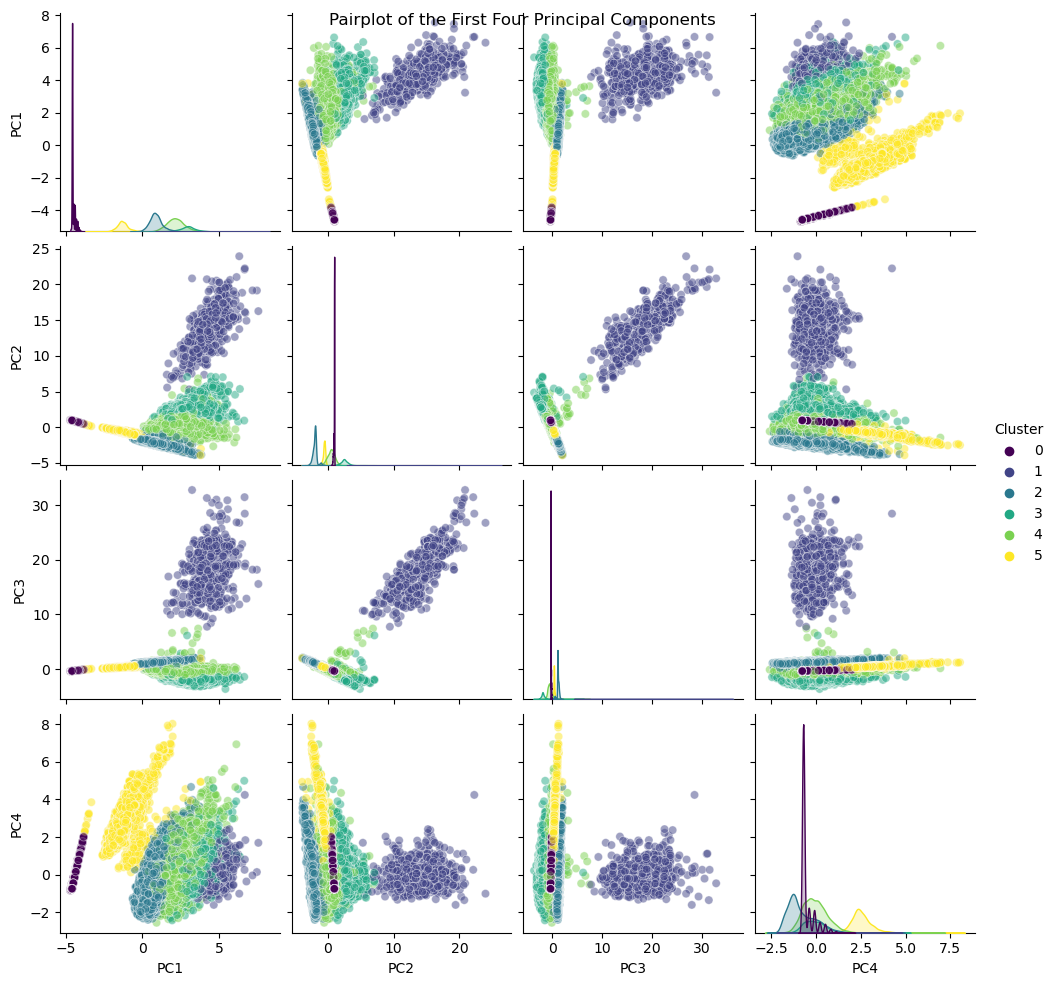

In [29]:
# Create a DataFrame with the first few principal components and cluster labels
pca_df = pd.DataFrame(data=principal_components[:, :4], columns=[f'PC{i+1}' for i in range(4)])
pca_df['Cluster'] = clusters

sns.pairplot(pca_df, hue='Cluster', palette='viridis', plot_kws={'alpha': 0.5})
plt.suptitle('Pairplot of the First Four Principal Components', verticalalignment='top')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score
silhouette_avg = silhouette_score(principal_components, cluster_labels)

print("Silhouette Score:", silhouette_avg)

In [31]:
data

,interview_outcome,household_members,family_income,highest_level_of_school,education_level,professional_certification1,cert_issued_by_state_or_gov,is_cert_required,employment_status,primary_industry_code_job1,...,weekly_earnings,race,age,gender,citizenship_status,state_code,usual_hours_worked,reason_for_unemployment,health_status_impacting_work,Cluster
0,201,3,12.0,-1.0,37.0,2.0,-1.0,-1.0,4.0,4.0,...,-1.0,1.0,35.0,2.0,1.0,1,-1.0,2.0,2.0,4
1,201,3,12.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,1.0,12.0,1.0,1.0,1,-1.0,-1.0,2.0,5
2,201,3,12.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,1.0,9.0,2.0,1.0,1,-1.0,-1.0,2.0,5
3,201,1,13.0,-1.0,40.0,2.0,-1.0,-1.0,1.0,18.0,...,115400.0,1.0,50.0,2.0,1.0,1,40.0,-1.0,2.0,4
4,201,2,16.0,-1.0,40.0,2.0,-1.0,-1.0,1.0,4.0,...,72000.0,1.0,58.0,1.0,1.0,1,40.0,-1.0,2.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126779,218,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,56,-1.0,-1.0,-1.0,0
126780,218,5,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,56,-1.0,-1.0,-1.0,0
126781,218,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,56,-1.0,-1.0,-1.0,0
126782,218,5,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,56,-1.0,-1.0,-1.0,0
